In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ----- machine learning
from sklearn.datasets import load_iris

# Covarianza

¿Como sabemos que tanta dependencia estadística hay entre una variable y otra?

$$Cov(x1, x2) =  E(x1 - \mu_{x1})(x2- \mu_{x2})$$

# Correlación

$$Cov(x_1,x_2) = \rho \sigma_1 \sigma_2 \\
\rho = \frac{Cov(x_1,x_2)}{{Var(x_1)Var(x_2)}^{1/2}}
$$

In [246]:
def corr(cov, x1, x2):
    return (cov / np.sqrt(x1.var() * x2.var()))

N = 1000
x = np.random.normal(size=N)
y1 = np.random.normal(size=N)
xres = x - x.mean()
y1res = y1 - y1.mean()
covxy1 = (xres * y1res).sum() / (N -1)
print(covxy1)
print(corr(covxy1, x, y1))

0.010474329061967463
0.010402487299607842


In [247]:
a = -2
y2 = x * a + np.random.normal()
y2res = y2 - y2.mean()
covxy2 = (xres * y2res).sum() / (N - 1)
print(covxy2)
print(corr(covxy2, x, y2))

-2.097101994947353
-1.0010010010010009


In [22]:
data = load_iris()

In [24]:
X = pd.DataFrame(data=data["data"], columns=data["feature_names"])

In [25]:
y = data["target"]

In [26]:
equivalencias = dict(zip(np.unique(y), data["target_names"]))

In [27]:
dataset = pd.DataFrame(data=np.hstack(tup=(X.values, y.reshape(-1,1))), columns=data["feature_names"] + ["Class"]) #, list(map(lambda x: equivalencias[x], y)))))

In [28]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
dataset["c"] = 1
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,c
0,5.1,3.5,1.4,0.2,0.0,1
1,4.9,3.0,1.4,0.2,0.0,1
2,4.7,3.2,1.3,0.2,0.0,1
3,4.6,3.1,1.5,0.2,0.0,1
4,5.0,3.6,1.4,0.2,0.0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,1
146,6.3,2.5,5.0,1.9,2.0,1
147,6.5,3.0,5.2,2.0,2.0,1
148,6.2,3.4,5.4,2.3,2.0,1


In [26]:
print(dataset)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Class  
0      0.0  
1

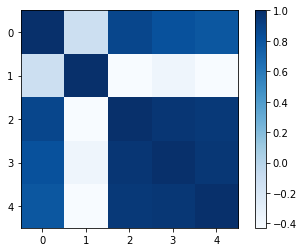

In [29]:
plt.imshow(dataset.corr(), cmap=plt.cm.Blues)
plt.colorbar()

In [39]:
from mayavi.mlab import points3d

In [37]:
def test_points3d(x, y, z, s):
    s2 = s / 10
    clases = np.unique(s2)
    for si in clases:
        fil = np.array(list(filter(lambda yi: yi[3]==si, zip(x, y, z, s2))))
        color = (si*10%2, si, 1-si)
        points3d(fil[:, 0], fil[:, 1], fil[:, 2], fil[:, 3], color=color,
        colormap="copper", scale_factor=.25)
    mlab.show()

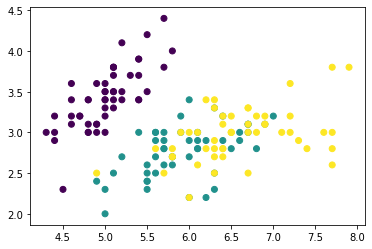

In [30]:
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=dataset.iloc[:, 4] + 1)

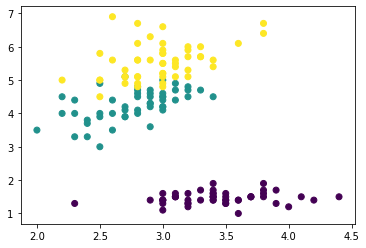

In [33]:
plt.scatter(dataset.iloc[:, 1], dataset.iloc[:, 2], c=dataset.iloc[:, 4] + 1)

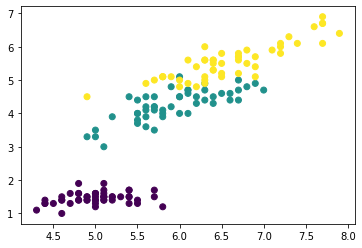

In [36]:
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 2], c=dataset.iloc[:, 4] + 1)